In [1]:
import re
import os
import matplotlib.pyplot as plt
import numpy as np
import math

In [40]:
my_dictionary = []
directory_path = 'dictionary_no_space'
for filename in os.listdir(directory_path):
    if filename.endswith(".txt"):
        file_path = os.path.join(directory_path, filename)
        lines = open(file_path,'r', encoding='utf-8').read().split('\n')
        for line in lines:
            my_dictionary.append(line.strip())

In [41]:
def get_syllables_count(word):
    vowel_pattern = '[aąeęioóuy]+'
    i_pattern = 'i[aąeęioóuy]'
    diphthong_pattern = '[ae]u'
    vowel_groups = re.findall(vowel_pattern, word)
    count = 0
    for vowel_group in vowel_groups:
        count += len(vowel_group)
        if re.match(i_pattern, vowel_group):
            count -= 1
        if re.match(diphthong_pattern, vowel_group):
            count -= 1
    return count

In [42]:
def get_last_vowels(word):
    word = word.replace('ó', 'u')
    vowel_pattern = '[aąeęioóuy]+'
    i_pattern = 'i[aąeęioóuy]'
    vowel_groups = re.findall(vowel_pattern, word)
    if len(vowel_groups) == 0:
        return ''
    else:
        vowel_group = vowel_groups[-1]
        if re.match(i_pattern, vowel_group):
            return vowel_group[-2:]
        else:
            return vowel_group[-1:]

In [43]:
def get_last_consonants(word):
    # zakładam, że spółgłoski są na końcu słowa
    consonant_pattern = '[^aąeęioóuy]+'
    consonant_groups = re.findall(consonant_pattern, word)
    if len(consonant_groups) == 0:
        return ''
    else:
        consonant_group = consonant_groups[-1]
        if consonant_group in ['ż', 'rz']:
            return 'sz'
        elif consonant_group == 'dż':
            return 'cz'
        elif consonant_group == 'b':
            return 'p'
        elif consonant_group == 'g':
            return 'k'
        elif consonant_group == 'dź':
            return 'ć'
        elif consonant_group == 'dz':
            return 'c'
        elif consonant_group == 'w':
            return 'f'
        elif consonant_group == 'd':
            return 't'
        elif consonant_group == 'z':
            return 's'
        elif consonant_group == 'ch':
            return 'h'
        else:
            return consonant_group

In [44]:
def get_word_ending(word):
    last_vowels = get_last_vowels(word)
    vowel_pattern = '[aąeęioóuy]'
    if re.match(vowel_pattern, word[-1]):
        return last_vowels
    else:
        return last_vowels + get_last_consonants(word)

In [45]:
def get_word_key(word):
    syllables_count = get_syllables_count(word)
    ending = get_word_ending(word)
    return str(syllables_count) + '_' + ending

In [46]:
def get_word_beginning(word):
    vowel_pattern = '[aąeęioóuy]+'
    i_pattern = 'i[aąeęioóuy]'
    vowel_matches = re.finditer(vowel_pattern, word)
    vowel_match = None
    for match in vowel_matches:
        vowel_match = match
    
    if not vowel_match:
        return ''
    else:
        vowel_group = vowel_match.group()
        if re.match(i_pattern, vowel_group):
            # return word[:vowel_index-2]
            return word[:vowel_match.end()-2]
        else:
            # return word[:vowel_index-1]
            return word[:vowel_match.end()-1]

In [47]:
def get_indexed_dictionary(dictionary):
    indexed_dictionary = {}
    for word in dictionary:
        key = get_word_key(word)
        if key in indexed_dictionary:
            indexed_dictionary[key].append(word)
        else:
            indexed_dictionary[key] = [word]
    return indexed_dictionary

In [48]:
def get_ending_dictionary(dictionary):
    indexed_dictionary = {}
    for word in dictionary:
        key = get_word_ending(word)
        if key in indexed_dictionary:
            indexed_dictionary[key].append(word)
        else:
            indexed_dictionary[key] = [word]
    return indexed_dictionary

In [49]:
ending_dictionary = get_ending_dictionary(my_dictionary)

In [50]:
indexed_dictionary = get_indexed_dictionary(my_dictionary)

In [51]:
len(indexed_dictionary)

3060

In [52]:
len(ending_dictionary)

1382

In [53]:
endings_count = [len(ending_dictionary[key]) for key in ending_dictionary.keys()]

In [54]:
endings_count_sorted = sorted(endings_count, reverse=True)

In [55]:
endings_count = {key: len(ending_dictionary[key]) for key in ending_dictionary.keys()}

In [56]:
endings_ranking_keys = [key for key, value in sorted(endings_count.items(), key=lambda item: item[1], reverse=True)]

In [57]:
endings_ranking_values = [value for key, value in sorted(endings_count.items(), key=lambda item: item[1], reverse=True)]

In [58]:
endings_ranking_values[0:10]

[111816, 95537, 55205, 49778, 47113, 43143, 42228, 40569, 30826, 28234]

In [61]:
endings_ranking_keys[0:10]

['i', 'y', 'a', 'ie', 'o', 'ą', 'e', 'u', 'om', 'ah']

Text(0, 0.5, 'Liczba słów o danej końcówce')

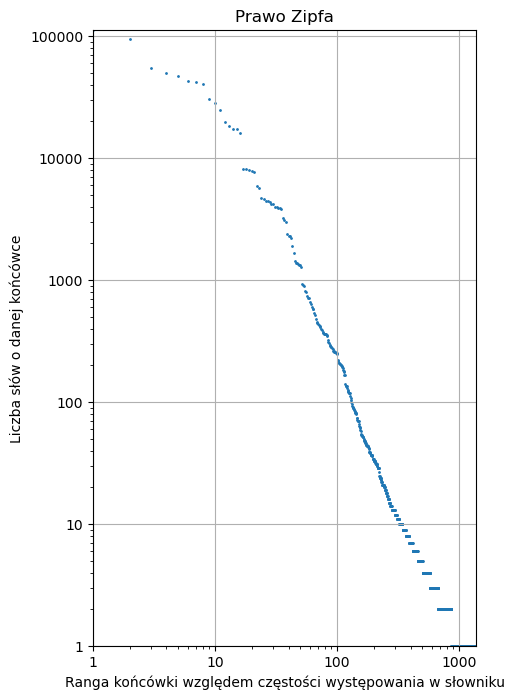

In [117]:
from matplotlib.ticker import ScalarFormatter


plt.figure(figsize=(8, 8))
plt.xscale('log')
plt.yscale('log')
plt.xlim(1, len(endings_ranking_values)+1)
plt.ylim(1, max(endings_ranking_values))
ax = plt.gca().set_aspect('equal', adjustable='box')
plt.gca().xaxis.set_major_formatter(ScalarFormatter())
plt.gca().yaxis.set_major_formatter(ScalarFormatter())
plt.grid(True)
plt.scatter(range(1, len(endings_ranking_values)+1), endings_ranking_values, s=1)
plt.title('Prawo Zipfa')
plt.xlabel('Ranga końcówki względem częstości występowania w słowniku')
plt.ylabel('Liczba słów o danej końcówce')

In [98]:
def get_rhymes_list(word, syllables_counts = -1):
    rhymes_list = []
    ending = get_word_ending(word)
    if syllables_counts == -1:
        syllables_counts = list(range(1,10))
    for syllables_count in syllables_counts:
        key = str(syllables_count) + '_' + ending
        rhymes = indexed_dictionary.get(key, None)
        if rhymes is not None:
            for rhyme in rhymes:
                if rhyme == word:
                    continue
                rhymes_list.append(rhyme)
    return rhymes_list

In [99]:
get_rhymes_list('pociąg')

['ciąg',
 'ksiąg',
 'siąg',
 'wciąg',
 'wsiąk',
 'ściąg',
 'dociąg',
 'naciąg',
 'osiąg',
 'obciąg',
 'odciąg',
 'trójksiąg',
 'uciąg',
 'wyciąg',
 'zaciąg',
 'zasiąg',
 'zawciąg',
 'ciepłociąg',
 'gazociąg',
 'grubociąg',
 'linociąg',
 'lachociąg',
 'lutniociąg',
 'ropociąg',
 'rurociąg',
 'rybociąg',
 'taśmociąg',
 'ślinociąg']

In [100]:
def get_score(original_word, checked_word):
    original_word_ending = get_word_ending(original_word)
    checked_word_ending = get_word_ending(checked_word)
    score = 0
    if original_word_ending != checked_word_ending:
        final_score = 0
    else:
        original_word_syllables = get_syllables_count(original_word)
        checked_word_syllables = get_syllables_count(checked_word)
        if original_word_syllables == 1:
            score = 1
        else:
            vowel_pattern = '[aąeęioóuy]'
            consonant_pattern = '[^aąeęioóuy]'
            if re.match(vowel_pattern, original_word_ending[-1]):
                score = 0.4
            else:
                score = 0.7
                
            original_word_beginning = get_word_beginning(original_word)
            checked_word_beginning = get_word_beginning(checked_word)
            original_word_beginning = original_word_beginning.replace('ó', 'u').replace('ch', 'h').replace('au', 'ał').replace('eu', 'eł')
            checked_word_beginning = checked_word_beginning.replace('ó', 'u').replace('ch', 'h').replace('au', 'ał').replace('eu', 'eł')
            
            match = re.search(vowel_pattern, original_word_beginning)
            max_letters = len(original_word_beginning[match.start():])
            
            same_letters = 0
            for i in range(min(max_letters, len(checked_word_beginning))):
                if original_word_beginning[-1-i] == checked_word_beginning[-1-i]:
                    same_letters += 1
                else:
                    break
            
            score = score + (1 - score) * same_letters / max_letters  
        
        syllables_difference = abs(original_word_syllables - checked_word_syllables)
        final_score = score * (1 - 0.05*syllables_difference)
        final_score = max(final_score, 0)
    return round(final_score, 2)    

In [101]:
get_score('lokomotywa', 'aktywa')

0.56

In [102]:
def get_scoreboard(word, syllables_count=-1):
    rhymes = get_rhymes_list(word, syllables_count)
    scoreboard = {rhyme : get_score(word, rhyme) for rhyme in rhymes}
    sorted_scoreboard = sorted(scoreboard.items(), key=lambda x:x[1], reverse=True)
    return sorted_scoreboard

In [103]:
get_scoreboard('aktywa')

[('aspektywa', 0.84),
 ('inwektywa', 0.84),
 ('wotywa', 0.76),
 ('donatywa', 0.72),
 ('fiksatywa', 0.72),
 ('lewatywa', 0.72),
 ('afirmatywa', 0.68),
 ('akredytywa', 0.68),
 ('alternatywa', 0.68),
 ('augmentatywa', 0.68),
 ('egzekutywa', 0.68),
 ('ekspektatywa', 0.68),
 ('inchoatywa', 0.68),
 ('inicjatywa', 0.68),
 ('lokomotywa', 0.68),
 ('legislatywa', 0.68),
 ('chedywa', 0.64),
 ('dobywa', 0.64),
 ('domywa', 0.64),
 ('dorywa', 0.64),
 ('dożywa', 0.64),
 ('dogrywa', 0.64),
 ('dopływa', 0.64),
 ('dosrywa', 0.64),
 ('doszywa', 0.64),
 ('fałszywa', 0.64),
 ('kedywa', 0.64),
 ('kursywa', 0.64),
 ('kurzywa', 0.64),
 ('nabywa', 0.64),
 ('narywa', 0.64),
 ('nazywa', 0.64),
 ('nadrywa', 0.64),
 ('nagrywa', 0.64),
 ('nakrywa', 0.64),
 ('napływa', 0.64),
 ('naszywa', 0.64),
 ('naużywa', 0.64),
 ('nazrywa', 0.64),
 ('nieżywa', 0.64),
 ('obywa', 0.64),
 ('omywa', 0.64),
 ('ozywa', 0.64),
 ('ożywa', 0.64),
 ('obmywa', 0.64),
 ('obrywa', 0.64),
 ('odbywa', 0.64),
 ('odmywa', 0.64),
 ('odrywa', 0.64